In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [6]:
from sklearn.decomposition import PCA

pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

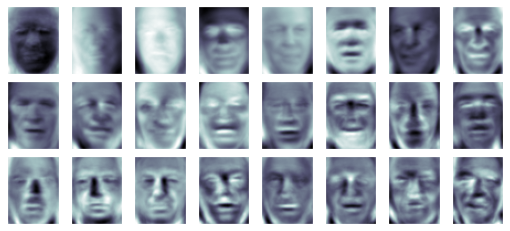

In [7]:
%matplotlib inline 
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 8, figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    


Text(0, 0.5, 'cumulative explained variance')

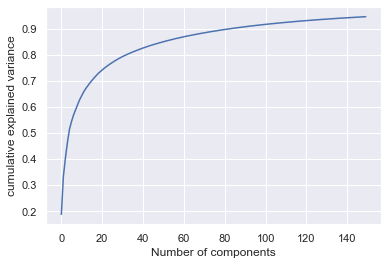

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, '150-dim')

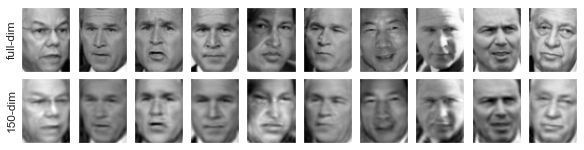

In [9]:
#compute the components and project faces

pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

#plot the res
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), 
                      subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47),  cmap='binary_r')
ax[0, 0].set_ylabel('full-dim')
ax[1,0].set_ylabel('150-dim')